In [4]:
!pip install gekko

     |████████████████████████████████| 10.8MB 7.5MB/s 


In [5]:
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt
import math
from math import sqrt
from gekko import GEKKO

In [6]:
a1, a2, a3 = 19.0, 21.0, 1.0
b1, b2, b3 = 15.0, 10.0, 12.0
c1, c2, c3 = 1.0, 18.0, 20.0

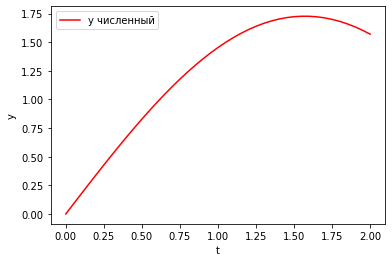

In [7]:
# 6

num_of_fractions = 41
t = np.linspace(0, 2, num_of_fractions)
dt = t[1] - t[0]

## y' = ((y[1:] - y[:-1]) / dt)
## y = y[1:]


def f_6(y):
    return np.sum(((y[1:] - y[:-1]) / dt) ** 2 - y[1:] ** 2)


y0_6 = [0.2 for x in range(0, num_of_fractions)]

bounds_6 = [(None, None) for x in range(0, num_of_fractions)]
bounds_6[0], bounds_6[-1] = (-10e-6, 10e-6), (math.pi / 2 - 10e-6, math.pi / 2 + 10e-6)

res_6 = minimize(f_6, y0_6, method = 'l-bfgs-b', bounds=bounds_6)


def f_anal(t):
    return np.sum()


plt.plot(t, res_6.x, 'r') # , t, f_analytical(t), '--b'
plt.xlabel('t')
plt.ylabel('y')
plt.legend(('у численный', 'у аналитический'))
plt.show()

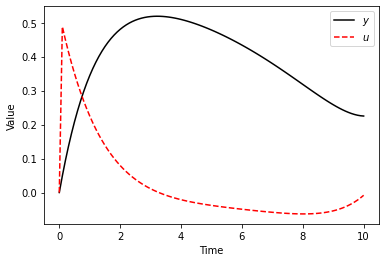

In [15]:
# 7.1

m = GEKKO(remote=False)
nt = 101
m.time = np.linspace(0, 10, nt)

y = m.Var(value=0)
z = m.Var(value=5)
t = m.Var(value=0)
u = m.Var(value=0)
p = np.zeros(nt)
#p[-1] = 0.0
final = m.Param(value=p)

m.Equation(y.dt()==u)
m.Equation(t.dt()==1)
m.Equation(z.dt()==(y - m.cos(t)) ** 2 + u ** 2)
m.Obj(z*final)
m.options.IMODE = 6
m.solve(disp=False)

plt.plot(m.time, y.value, 'k-', label=r'$y$')
plt.plot(m.time, u.value, 'r--', label=r'$u$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

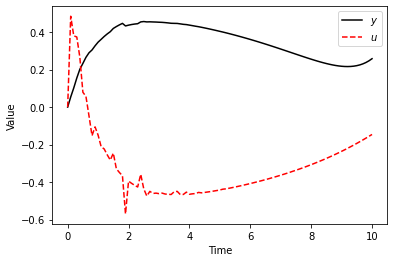

In [16]:
# 7.2

m = GEKKO(remote=False)
nt = 101
m.time = np.linspace(0, 10, nt)

y = m.Var(value=0)
z = m.Var(value=5)
t = m.Var(value=0)
u = m.Var(value=0)
p = np.zeros(nt)
#p[-1] = 0.0
final = m.Param(value=p)

m.Equation(y.dt()==u + y)
m.Equation(t.dt()==1)
m.Equation(z.dt()==(y - m.cos(t)) ** 2 + u ** 2)
m.Obj(z*final)
m.options.IMODE = 6
m.solve(disp=False)

plt.plot(m.time, y.value, 'k-', label=r'$y$')
plt.plot(m.time, u.value, 'r--', label=r'$u$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

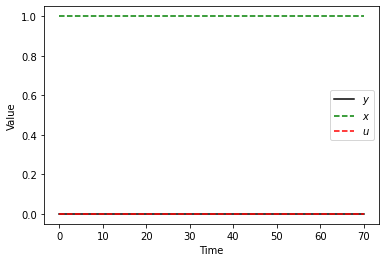

In [26]:
# 8

# https://gekko.readthedocs.io/en/latest/examples.html

# a = alpha
# b = beta
# c = gamma

m = GEKKO(remote=False)
nt = 101
m.time = np.linspace(0, 70, nt)

y = m.Var(value=0)
x = m.Var(value=1)
t = m.Var(value=0)
u = m.Var(value=0)
a = m.Var(value=0)
b = m.Var(value=0)
c = m.Var(value=0)
p = np.zeros(nt)
#p[-1] = 0.0
final = m.Param(value=p)

#m.Equation(u = x / (x+y))
m.Equation(t.dt()==1)
m.Equation(y== c * (1 - u) * x)
m.Equation(x.dt()== (a * u - b) * x)
m.Obj(y*final)
m.options.IMODE = 6
m.solve(disp=False)

plt.plot(m.time, y.value, 'k-', label=r'$y$')
plt.plot(m.time, x.value, 'g--', label=r'$x$')
plt.plot(m.time, u.value, 'r--', label=r'$u$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [ ]:
m = GEKKO(remote=False)
nt = 101
m.time = np.linspace(0, 70, nt)

y = m.Var(value=0)
x = m.Var(value=1)
t = m.Param(value=m.time)
u = m.Var(value=0)
a = m.Var(value=0)
b = m.Var(value=0)
c = m.Var(value=0)
p = np.zeros(nt)
#p[-1] = 0.0
final = m.Param(value=p)

eq_y = c * (1 - u) * x
eq_x = (a * u - b) * x
eq_u = x/(x+y)

m.Equation(t.dt()==1)
m.Equation(y== c * (1 - u) * x)
m.Equation(x.dt()== (a * u - b) * x)
m.Obj(y*final)
m.options.IMODE = 6
m.solve(disp=False)